# Escuela de Física del Tecnológico de Costa Rica
# IF4702 - Física Computacional I
# Tarea 07
## Estudiante: Andrey Novoa O´connor
## Carnet: 2018144970
## Profesores:
## Jóse Esteban Pérez / Álvaro Amador

# Parte #01

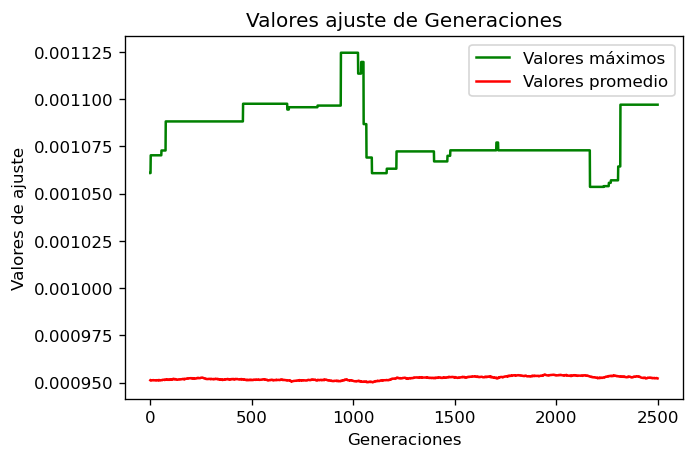

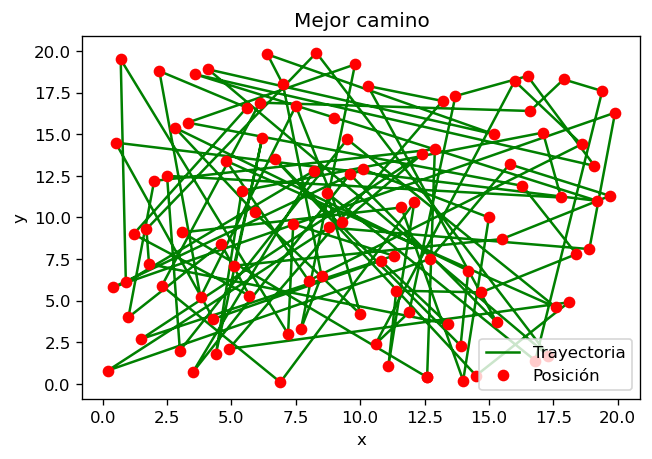

Ruta más corta 889.2419668214417
Mejor valor de ajuste:  0.0011245533131712827


In [3]:
"Se importan las librerías con las que se va a trabajar"
import numpy as np
import matplotlib.pyplot as plt
import random

#-----------------------------------------------------Parámetros-----------------------------------------------------------#

"Se definen los parámetros para el modelo"
nPoblacion = 300                           # Cantidad de poblaciones
nGeneraciones = 2500                       # Cantidad de generaciones


#--------------------------------------------Generador de coordenadas------------------------------------------------------#

coordenada = []                            #Se define la lista donde se va a almacenar cada una de las coordenadas generadas
listaCoordenadas = []                      #Se define la lista donde se almacenaran todas las coordenadas

for i in range(100):
    #Este ciclo genera 100 coordendas (x,y) que se van almacenando en la listaCoordenadas
    x = 0.1*((9+13*(i^2))%200)
    y = 0.1*(((7+1327*i))%200)
    coordenada.append(x)
    coordenada.append(y)
    listaCoordenadas.append(coordenada)
    coordenada = []
nGenes = len(listaCoordenadas)              # Se almacena la cantidad de genes que es equivalente a la cantidad de ciudades 
Pmut = 1/nGenes                            # Probabilidad de mutación
#Pmut = 0.25

#----------------------------------------------funciones auxiliares----------------------------------------------------------#

def Inicializacion(nPoblacion, nGenes):
    #Se define la matriz de poblacion donde se van a almacenar los cromosomas
    poblacion = np.zeros((nPoblacion, nGenes))
    #Este ciclo crea la población añadiendo un cromosoma por iteración
    for i in range(nPoblacion):
        Ciudades = []
        #Este ciclo crea un cromosoma
        for j in range (nGenes):
            #Se crea un gen aleatorio
            GenAleatorio = int(random.choice([i for i in range(0,nGenes) if i not in Ciudades]))
            Ciudades.append(GenAleatorio)
            poblacion[i,j] = GenAleatorio
    return poblacion


def CodificacionCromosoma(cromosoma):
    distancia = 0
    x = []
    y = []
    #Este ciclo almacena las listas para los valores de posición (x,y)
    for i in range(len(cromosoma)):
        posicion = int(cromosoma[i])
        coordenada_x = listaCoordenadas[posicion][0]
        coordenada_y = listaCoordenadas[posicion][1]
        x.append(coordenada_x)
        y.append(coordenada_y)
    nGenes = len(cromosoma)
    #Este ciclo calcula la ditancia euclidiana y la almacena
    for j in range(0,nGenes-1):
        deltaX = x[j]-x[j+1]
        deltaY = y[j]-y[j+1]
        distancia+=np.sqrt(deltaX**2+deltaY**2)
    deltaX_i = x[nGenes-1]-x[0]
    deltaY_i = y[nGenes-1]-y[0]
    distancia_i = np.sqrt(deltaX_i**2+deltaY_i**2)
    distancia += distancia_i
    return distancia


def evaluar(distanciaEuclideana):
    #Se determina el inverso de la distancia euclideana para el ajuste
    ValorF = 1/distanciaEuclideana
    return ValorF


def OperadorMutacion(cromosoma, Pmut):
    # Intercambia las posiciones de dos genes de cromosoma. 
    nGenes = len(cromosoma)
    cromosomaMutado = np.copy(cromosoma)
    GenAleatorio = np.random.random()
    P1 = np.random.randint(0,nGenes)
    P2 = np.random.randint(0,nGenes)
    #Se selecciona el gen mutado
    if GenAleatorio < Pmut:
        # Se revisa si se cumple con la probabilidad de mutación
        cromosomaMutado[P1] = cromosoma[P2]
        cromosomaMutado[P2] = cromosoma[P1]
    return cromosomaMutado


def CromosomaOptimo(poblacion,nPoblacion,nGenes):
    ajuste = []
    # Este ciclo calcula los ajustes recorriendo cada cromosoma
    for i in range(nPoblacion):
        cromosoma = poblacion[i]
        distancia_cromosoma_i = CodificacionCromosoma(cromosoma)
        valor_ajus = evaluar(distancia_cromosoma_i)
        ajuste.append(valor_ajus)
    return ajuste


#----------------------------------------------función principal----------------------------------------------------------#

"Se llama la función Inicialización"
poblacion = Inicializacion(nPoblacion, nGenes)

listaAjuste = []  # Se crea la lista donde se van a ir guardando los valores de ajuste
poblaciones = []           # Se crea la lista donde se van a ir guardando las poblaciones
genMejorAjuste = 0       # Se crea la variable donde almacena la generación de mejor ajuste

for i in range(nGeneraciones):
    # Este ciclo va añadiendo las poblaciones y los valores de ajuste
    listaAjuste.append(CromosomaOptimo(poblacion,nPoblacion,nGenes))
    poblaciones.append(poblacion)
    # Este ciclo muta los genes para las generaciones que siguen
    for j in range (nPoblacion):
        mutar_crom = poblacion[j]
        poblacion[j] = OperadorMutacion(mutar_crom,Pmut)
mejorAjuste=np.max(listaAjuste[0])


for j in range (0,len(listaAjuste[0])):
    #Este ciclo encuentra el cromosoma de mejor ajuste
    if listaAjuste[0][j] == np.max(listaAjuste[0]):
        mejorCromosoma = poblaciones[i][j]
        

for i in range(1,len(listaAjuste)):
    # Este ciclo revisa cual generacion tiene el mejor valor de ajuste
    if mejorAjuste < np.max(listaAjuste[i]):
        mejorAjuste = np.max(listaAjuste[i])
        genMejorAjuste = i
        for j in range (0,len(listaAjuste[i])):
            #Este ciclo revisa la posición del mejor cromosoma
            if listaAjuste[0][j] == np.max(listaAjuste[i]):
                mejorCromosoma = poblaciones[i][j]
    else:
        pass

#----------------------------------------------------Gráficas-------------------------------------------------------------#    

"Se genera un arreglo donde se van a ir almacenando las generaciones para su graficación"
graficoGeneraciones = np.arange(0,nGeneraciones)


"Se genera la gráfica para los valores promedios y maximos"
graficoValoresMax = []                     # Se define una lista donde se van a ir almacenando los valores maximos para graficarlos
graficoValoresPromedios = []               # Se define una lista donde se van a ir almacenado los valores promedios para graficarlos


for i in listaAjuste:
    # Este ciclo va a ir añadiendo los valores maximos y promedios a los arreglos creados anteriormente
    graficoValoresMax.append(np.max(i))
    graficoValoresPromedios.append(np.mean(i))
    

#Se grafica los valores de ajuste promedio y máximo
fig,ax=plt.subplots(dpi=120)
ax.plot(graficoGeneraciones,graficoValoresMax,"g")
ax.plot(graficoGeneraciones,graficoValoresPromedios, "r")
ax.set_title('Valores ajuste de Generaciones')
ax.set_xlabel('Generaciones')
ax.set_ylabel('Valores de ajuste')
ax.legend(["Valores máximos","Valores promedio"])
plt.show()


"Se genera la gráfica para los mejores cromosomas"
coordenadasMejorCromosoma = []              # Se define una lista que va almacenar las coordenadas para el mejor cromosoma
coordenadasMejorCromosomaX = []             # Se define una lista que va almacenar las coordenadas para el mejor cromosoma para el eje x
coordenadasMejorCromosomaY = []             # Se define una lista que va almacenar las coordenadas para el mejor cromosoma para el eje y


for i in mejorCromosoma:
    # Este ciclo va agregando las coordenadas
    coordenadasMejorCromosoma.append(listaCoordenadas[int(i)])
for j in range(len(coordenadasMejorCromosoma)):
    # Este ciclo va agregando las coordenadas en (x,y)
    coordenadasMejorCromosomaX.append(coordenadasMejorCromosoma[j][0])
    coordenadasMejorCromosomaY.append(coordenadasMejorCromosoma[j][1])

#Se agrega coordenada para que el camino sea cerrado
coordenadasMejorCromosoma.append(coordenadasMejorCromosoma[0])
coordenadasMejorCromosomaX.append(coordenadasMejorCromosomaX[0])
coordenadasMejorCromosomaY.append(coordenadasMejorCromosomaY[0])

 
#Se grafica la ruta del cromosoma óptimo 
fig,ax=plt.subplots(dpi=120)
ax.plot(coordenadasMejorCromosomaX,coordenadasMejorCromosomaY, "g-")
ax.plot(coordenadasMejorCromosomaX,coordenadasMejorCromosomaY, "ro")
ax.set_title('Mejor camino')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(["Trayectoria","Posición"])
plt.show()

#--------------------------------------------------Mostrar los mejores datos------------------------------------#

print("Ruta más corta", 1/mejorAjuste)
print("Mejor valor de ajuste: ", mejorAjuste)

# Parte #02

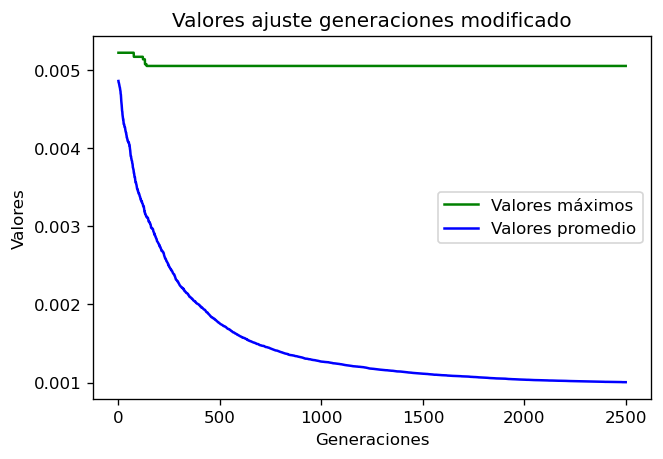

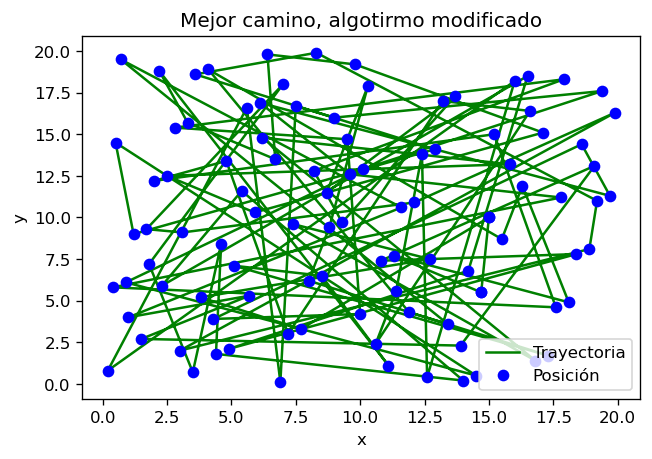

Ruta más corta:  191.62102120198514
Mejor valor de ajuste:  0.005218634123371639


In [5]:
"Se importan las librerías con las que se va a trabajar"
import numpy as np
import matplotlib.pyplot as plt
import random

#-----------------------------------------------------Parámetros-----------------------------------------------------------#

"Se definen los parámetros para el modelo"
nPoblacion = 300                           # Cantidad de poblaciones
nGeneraciones = 2500                       # Cantidad de generaciones

#--------------------------------------------Generador de coordenadas------------------------------------------------------#

coordenada = []                            #Se define la lista donde se va a almacenar cada una de las coordenadas generadas
listaCoordenadas = []                      #Se define la lista donde se almacenaran todas las coordenadas

for i in range(100):
    #Este ciclo genera 100 coordendas (x,y) que se van almacenando en la listaCoordenadas
    x = 0.1*((9+13*(i^2))%200)
    y = 0.1*(((7+1327*i))%200)
    coordenada.append(x)
    coordenada.append(y)
    listaCoordenadas.append(coordenada)
    coordenada = []
nGenes = len(listaCoordenadas)              # Se almacena la cantidad de genes que es equivalente a la cantidad de ciudades 
Pmut = 1/nGenes                            # Probabilidad de mutación
#Pmut = 0.25

#----------------------------------------------funciones auxiliares----------------------------------------------------------#


def InicializacionModificada(nPoblacion,nGenes):
    #Se inicializa la matriz poblacion que contendrá los cromosomas
    poblacion=np.zeros((nPoblacion, nGenes))
    
    #Este ciclo crea la población, añadiendo un cromosoma por iteración hasta completar el tamaño deseado
    for i in range(nPoblacion):
        #Se designa un nodo inicial de forma aleatoria 
        nodo_inicial = np.random.randint(0,nGenes)
        #Se crea la lista que almacenará los genes por cromosoma creado, para revisar que no se repitan nodos
        Ciudades = [nodo_inicial]
        #Este ciclo crea un cromosoma, al añadir la cantidad de genes deseada
        for j in range(nGenes):
            mejor_ruta = np.exp(100)
            #Este ciclo revisa todas las ciudades disponibles cuál es el vecino más cercano
            for k in range(nGenes):
                if k not in Ciudades:
                    ruta_actual = CodificacionCromosoma([Ciudades[-1],k])
                    if ruta_actual < mejor_ruta:
                        mejor_ruta = ruta_actual
                        vecino_mas_cercano = k
            Ciudades.append(vecino_mas_cercano)
            poblacion[i,j] = vecino_mas_cercano
    return poblacion



def CodificacionCromosoma(cromosoma):
    distancia = 0
    x = []
    y = []
    #Este ciclo almacena las listas para los valores de posición (x,y)
    for i in range(len(cromosoma)):
        posicion = int(cromosoma[i])
        coordenada_x = listaCoordenadas[posicion][0]
        coordenada_y = listaCoordenadas[posicion][1]
        x.append(coordenada_x)
        y.append(coordenada_y)
    nGenes = len(cromosoma)
    #Este ciclo calcula la ditancia euclidiana y la almacena
    for j in range(0,nGenes-1):
        deltaX = x[j]-x[j+1]
        deltaY = y[j]-y[j+1]
        distancia+=np.sqrt(deltaX**2+deltaY**2)
    deltaX_i = x[nGenes-1]-x[0]
    deltaY_i = y[nGenes-1]-y[0]
    distancia_i = np.sqrt(deltaX_i**2+deltaY_i**2)
    distancia += distancia_i
    return distancia



def evaluar(distanciaEuclideana):
    #Se determina el inverso de la distancia euclideana para el ajuste
    ValorF = 1/distanciaEuclideana
    return ValorF


def OperadorMutacion(cromosoma, Pmut):
    # Intercambia las posiciones de dos genes de cromosoma. 
    nGenes = len(cromosoma)
    cromosomaMutado = np.copy(cromosoma)
    GenAleatorio = np.random.random()
    P1 = np.random.randint(0,nGenes)
    P2 = np.random.randint(0,nGenes)
    #Se selecciona el gen mutado
    if GenAleatorio < Pmut:
        # Se revisa si se cumple con la probabilidad de mutación
        cromosomaMutado[P1] = cromosoma[P2]
        cromosomaMutado[P2] = cromosoma[P1]
    return cromosomaMutado

def CromosomaOptimo(poblacion,nPoblacion,nGenes):
    ajuste = []
    # Este ciclo calcula los ajustes recorriendo cada cromosoma
    for i in range(nPoblacion):
        cromosoma = poblacion[i]
        distancia_cromosoma_i = CodificacionCromosoma(cromosoma)
        valor_ajus = evaluar(distancia_cromosoma_i)
        ajuste.append(valor_ajus)
    return ajuste

#----------------------------------------------función principal----------------------------------------------------------#

"Se llama la función InicializaciónModificada"
poblacion = InicializacionModificada(nPoblacion, nGenes)


listaAjuste = []                             # Se crea la lista donde se van a ir guardando los valores de ajuste
poblaciones = []                             # Se crea la lista donde se van a ir guardando las poblaciones



for i in range(nGeneraciones):
    # Este ciclo agrega los de ajuste y población a las listas creadas anteriormente
    listaAjuste.append(CromosomaOptimo(poblacion,nPoblacion,nGenes))
    poblaciones.append(poblacion)
    #Se calcula random cuantas mutaciones se harán en un rango de 3 a 10
    cantidad_de_mutaciones=np.random.randint(3,10)
    #Se mutan todos los genes para así tener la siguiente generación la cantidad de veces predicha
    for k in range(3,cantidad_de_mutaciones):
        #Se muta la población a excepción del primer individuo
        for j in range (1,nPoblacion):
            mutar_crom = poblacion[j]
            poblacion[j] = OperadorMutacion(mutar_crom,Pmut)
            
genMejorAjuste = 0                           # Se crea la variable donde almacena la generación de mejor ajuste
mejorAjuste = np.max(listaAjuste[0])         # Se define un arreglo donde se van a guardar los valores maximos de los valores ajustados

#Reviso la posición del mejor cromosoma
for j in range (0,len(listaAjuste[0])):
    # Este ciclo revisa la posición del mejor cromosoma
    if listaAjuste[0][j] == np.max(listaAjuste[0]):
        mejorCromosoma = poblaciones[i][j]

for i in range(1,len(listaAjuste)):
    # Este ciclo revisa el valor de mejor ajsute
    if mejorAjuste < np.max(listaAjuste[i]):
        mejorAjuste = np.max(listaAjuste[i])
        genMejorAjuste = i
        for j in range (0,len(listaAjuste[i])):
            if listaAjuste[0][j] == np.max(listaAjuste[i]):
                mejorCromosoma = poblaciones[i][j]
    else:
        pass


#----------------------------------------------------Gráficas-------------------------------------------------------------#    

"Se genera un arreglo donde se van a ir almacenando las generaciones para su graficación"
graficoGeneraciones = np.arange(0,nGeneraciones)


"Se genera la gráfica para los valores promedios y maximos"
graficoValoresMax = []                     # Se define una lista donde se van a ir almacenando los valores maximos para graficarlos
graficoValoresPromedios = []               # Se define una lista donde se van a ir almacenado los valores promedios para graficarlos


for i in listaAjuste:
    # Este ciclo va a ir añadiendo los valores maximos y promedios a los arreglos creados anteriormente
    graficoValoresMax.append(np.max(i))
    graficoValoresPromedios.append(np.mean(i))


    
#Se grafica los valores de ajuste promedio y máximo
fig,ax=plt.subplots(dpi=120)
ax.plot(graficoGeneraciones,graficoValoresMax,"g")
ax.plot(graficoGeneraciones,graficoValoresPromedios, "b")
ax.set_title('Valores ajuste generaciones modificado')
ax.set_xlabel('Generaciones')
ax.set_ylabel('Valores')
ax.legend(["Valores máximos","Valores promedio"])
plt.show()


"Se genera la gráfica para los mejores cromosomas"
coordenadasMejorCromosoma = []              # Se define una lista que va almacenar las coordenadas para el mejor cromosoma
coordenadasMejorCromosomaX = []             # Se define una lista que va almacenar las coordenadas para el mejor cromosoma para el eje x
coordenadasMejorCromosomaY = []             # Se define una lista que va almacenar las coordenadas para el mejor cromosoma para el eje y


for i in mejorCromosoma:
    # Este ciclo va agregando las coordenadas
    coordenadasMejorCromosoma.append(listaCoordenadas[int(i)])
for j in range(len(coordenadasMejorCromosoma)):
    # Este ciclo va agregando las coordenadas en (x,y)
    coordenadasMejorCromosomaX.append(coordenadasMejorCromosoma[j][0])
    coordenadasMejorCromosomaY.append(coordenadasMejorCromosoma[j][1])

#Se agrega coordenada para que el camino sea cerrado
coordenadasMejorCromosoma.append(coordenadasMejorCromosoma[0])
coordenadasMejorCromosomaX.append(coordenadasMejorCromosomaX[0])
coordenadasMejorCromosomaY.append(coordenadasMejorCromosomaY[0])


#Se grafica la ruta del cromosoma óptimo     
fig,ax=plt.subplots(dpi=120)
ax.plot(coordenadasMejorCromosomaX,coordenadasMejorCromosomaY, "g-")
ax.plot(coordenadasMejorCromosomaX,coordenadasMejorCromosomaY, "bo")
ax.set_title('Mejor camino, algotirmo modificado')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(["Trayectoria","Posición"])
plt.show()

#--------------------------------------------------Mostrar los mejores datos------------------------------------#

print("Ruta más corta: ", 1/mejorAjuste)
print("Mejor valor de ajuste: ", mejorAjuste)